# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()

True

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
api_key=os.getenv("News_API")
newsapi=NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines=newsapi.get_everything(q='Bitcoin', language='en')

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines=newsapi.get_everything(q='Ethereum', language='en')

In [6]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [7]:
#Function to create a data frame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [8]:
# Function to create the sentiment score and attaching it to a data frame
def sentiment_score(dataframe):
    title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],}
    text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],}
    
    for index, row in dataframe.iterrows():
        try:
            
        # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
            text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        except AttributeError:
            pass
    title_df=pd.DataFrame(title_sent) 
    text_df=pd.DataFrame(text_sent)
    df = dataframe.join(title_df).join(text_df)
    return df


In [12]:
#Creating a bitcoin and Ethereum dataframe using function 
btc_df=create_df(bitcoin_headlines["articles"], 'en')
eth_df = create_df(ethereum_headlines["articles"], "en")

In [13]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiment_df=sentiment_score(btc_df)
btc_sentiment_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,en,0.0000,0.000,1.000,0.000,0,0.6908,0.178,0.822,0.000,1
1,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,en,-0.8126,0.000,0.517,0.483,-1,-0.5719,0.111,0.705,0.184,-1
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,en,0.3182,0.247,0.753,0.000,1,-0.6124,0.000,0.857,0.143,-1
3,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,en,0.0000,0.000,1.000,0.000,0,0.6240,0.127,0.873,0.000,1
4,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.000,0,0.7264,0.164,0.836,0.000,1


In [15]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiment_df=sentiment_score(eth_df)
eth_sentiment_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,en,0.4703,0.253,0.747,0.0,1,0.3612,0.075,0.925,0.000,1
1,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,en,0.6705,0.379,0.621,0.0,1,-0.2411,0.000,0.939,0.061,-1
2,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.0,0,0.7264,0.164,0.836,0.000,1
3,Ether near two-month high ahead of major proto...,Ether held near two-month highs on Thursday a...,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",2021-08-05,en,0.0000,0.000,1.000,0.0,0,0.0000,0.000,1.000,0.000,0
4,"Upgrades, ESG, DeFi usage to help ether outpac...",The Ethereum platform's potential applications...,Representations of cryptocurrencies Bitcoin an...,2021-08-03,en,0.4019,0.197,0.803,0.0,1,0.0000,0.000,1.000,0.000,0


In [16]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sentiment_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.057905,0.045750,0.875750,0.078500,-0.100000,-0.008310,0.060000,0.880250,0.059750,0.050000
std,0.263197,0.099279,0.175543,0.135392,0.640723,0.493498,0.060037,0.101662,0.090311,0.887041
min,-0.812600,0.000000,0.458000,0.000000,-1.000000,-0.827100,0.000000,0.653000,0.000000,-1.000000
25%,-0.056575,0.000000,0.760500,0.000000,-0.250000,-0.405525,0.000000,0.836000,0.000000,-1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.056000,0.891000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.194750,0.000000,0.445000,0.096000,0.940000,0.088250,1.000000
max,0.433600,0.328000,1.000000,0.483000,1.000000,0.726400,0.178000,1.000000,0.287000,1.000000


In [17]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sentiment_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.00000
mean,0.151575,0.093500,0.890550,0.015950,0.35000,0.209565,0.063750,0.922800,0.01345,0.35000
std,0.244110,0.120641,0.118174,0.050501,0.67082,0.331383,0.075861,0.081637,0.02766,0.67082
min,-0.296000,0.000000,0.621000,0.000000,-1.00000,-0.340000,0.000000,0.782000,0.00000,-1.00000
25%,0.000000,0.000000,0.800500,0.000000,0.00000,0.000000,0.000000,0.842750,0.00000,0.00000
50%,0.000000,0.000000,0.909000,0.000000,0.00000,0.000000,0.000000,0.933500,0.00000,0.00000
75%,0.401900,0.199500,1.000000,0.000000,1.00000,0.528675,0.149250,1.000000,0.00000,1.00000
max,0.670500,0.379000,1.000000,0.196000,1.00000,0.771700,0.194000,1.000000,0.07200,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETHEREUM HAS A HIGHEST MEAN POSITIVE SCORE

Q: Which coin had the highest compound score?

A: ETHEREUM HAS THE HIGHEST COMPOUND SCORE

Q. Which coin had the highest positive score?

A: ETHEREUM HAS THE HIGHEST POSITIVE SCORE

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [20]:
# Complete the tokenizer function
def tokenizer(data):
    tokens=[]
    for i in data.text:
        sw = set(stopwords.words('english'))
        regex = re.compile("[^a-zA-Z ]")
        re_clean = regex.sub('', i)
        words = word_tokenize(re_clean)
        lem = [lemmatizer.lemmatize(word) for word in words]
        list1=[]
        for j in lem:
            if j.lower() not in sw:
                list1.append(j)
        tokens.append(list1)
    return tokens
    

In [21]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_sentiment_df['Tokenized Words']=tokenizer(btc_sentiment_df)
btc_sentiment_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,Tokenized Words
0,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,en,0.0000,0.000,1.000,0.000,0,0.6908,0.178,0.822,0.000,1,"[Like, Dogecoin, devotee, mayor, Reno, leader,..."
1,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,en,-0.8126,0.000,0.517,0.483,-1,-0.5719,0.111,0.705,0.184,-1,"[Filed, underThe, supply, chain, attack, ha, r..."
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,en,0.3182,0.247,0.753,0.000,1,-0.6124,0.000,0.857,0.143,-1,"[image, copyrightGetty, ImagesThe, gang, behin..."
3,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,en,0.0000,0.000,1.000,0.000,0,0.6240,0.127,0.873,0.000,1,"[get, roundup, TechCrunchs, biggest, important..."
4,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.000,0,0.7264,0.164,0.836,0.000,1,"[retail, investor, grew, comfortable, buying, ..."


In [23]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_sentiment_df['New Tokens']=tokenizer(eth_sentiment_df)
eth_sentiment_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,New Tokens
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,en,0.4703,0.253,0.747,0.0,1,0.3612,0.075,0.925,0.000,1,"[many, blockchain, platform, competing, invest..."
1,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,en,0.6705,0.379,0.621,0.0,1,-0.2411,0.000,0.939,0.061,-1,"[Blockchain, infrastructure, startup, heating,..."
2,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.0,0,0.7264,0.164,0.836,0.000,1,"[retail, investor, grew, comfortable, buying, ..."
3,Ether near two-month high ahead of major proto...,Ether held near two-month highs on Thursday a...,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",2021-08-05,en,0.0000,0.000,1.000,0.0,0,0.0000,0.000,1.000,0.000,0,"[HONG, KONG, Aug, Reuters, Ether, held, near, ..."
4,"Upgrades, ESG, DeFi usage to help ether outpac...",The Ethereum platform's potential applications...,Representations of cryptocurrencies Bitcoin an...,2021-08-03,en,0.4019,0.197,0.803,0.0,1,0.0000,0.000,1.000,0.000,0,"[Representations, cryptocurrencies, Bitcoin, E..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [92]:
from collections import Counter
from nltk import ngrams

In [93]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_bigram=[]
for i in btc_sentiment_df['Tokenized Words']:
    for j in i:
        btc_bigram.append(j)
btc_bigram=Counter(ngrams(btc_bigram,n=2))
print(btc_bigram)

Counter({('illustration', 'taken'): 5, ('July', 'Reuters'): 3, ('Reuters', 'Bitcoin'): 3, ('virtual', 'currency'): 3, ('currency', 'bitcoin'): 3, ('bitcoin', 'seen'): 3, ('seen', 'front'): 3, ('attack', 'ha'): 2, ('char', 'image'): 2, ('Bitcoin', 'Ethereum'): 2, ('representation', 'virtual'): 2, ('front', 'stock'): 2, ('stock', 'graph'): 2, ('graph', 'illustration'): 2, ('taken', 'November'): 2, ('November', 'REUTERSDado'): 2, ('REUTERSDado', 'RuvicIllustrationSINGAPORE'): 2, ('char', 'Reuters'): 2, ('char', 'Representations'): 2, ('Like', 'Dogecoin'): 1, ('Dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'Reno'): 1, ('Reno', 'leader'): 1, ('leader', 'El'): 1, ('El', 'Salvador'): 1, ('Salvador', 'Aldo'): 1, ('Aldo', 'Baoicchi'): 1, ('Baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'CEO'): 1, ('CEO', 'founder'): 1, ('founder', 'Canadian'): 1, ('Canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'Daymak'): 

In [94]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_bigram=[]
for i in eth_sentiment_df['New Tokens']:
    for j in i:
        eth_bigram.append(j)
eth_bigram=Counter(ngrams(eth_bigram,n=2))
print(eth_bigram)

Counter({('Bitcoin', 'Ethereum'): 4, ('char', 'Representations'): 4, ('illustration', 'taken'): 4, ('cryptocurrencies', 'Bitcoin'): 3, ('placed', 'PC'): 3, ('PC', 'motherboard'): 3, ('motherboard', 'illustration'): 3, ('taken', 'June'): 3, ('June', 'REUTERSDado'): 3, ('cryptocurrency', 'ethereum'): 3, ('Representations', 'cryptocurrencies'): 2, ('Ethereum', 'placed'): 2, ('Reuters', 'Ethereum'): 2, ('char', 'Ether'): 2, ('holder', 'staked'): 2, ('staked', 'billion'): 2, ('billion', 'worth'): 2, ('worth', 'cryptocurrency'): 2, ('ethereum', 'network'): 2, ('network', 'excitement'): 2, ('char', 'session'): 2, ('session', 'Transform'): 2, ('Transform', 'available'): 2, ('available', 'ondemand'): 2, ('ondemand', 'Watch'): 2, ('char', 'article'): 2, ('article', 'wa'): 2, ('wa', 'translated'): 2, ('translated', 'Spanish'): 2, ('Spanish', 'edition'): 2, ('edition', 'using'): 2, ('using', 'AI'): 2, ('AI', 'technology'): 2, ('technology', 'Errors'): 2, ('Errors', 'may'): 2, ('may', 'exist'): 2, 

In [95]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [96]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count_btc=token_count(btc_bigram,N=10)
token_count_btc

[(('illustration', 'taken'), 5),
 (('July', 'Reuters'), 3),
 (('Reuters', 'Bitcoin'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'front'), 3),
 (('attack', 'ha'), 2),
 (('char', 'image'), 2),
 (('Bitcoin', 'Ethereum'), 2)]

In [97]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count_eth=token_count(eth_bigram,N=10)
token_count_eth

[(('Bitcoin', 'Ethereum'), 4),
 (('char', 'Representations'), 4),
 (('illustration', 'taken'), 4),
 (('cryptocurrencies', 'Bitcoin'), 3),
 (('placed', 'PC'), 3),
 (('PC', 'motherboard'), 3),
 (('motherboard', 'illustration'), 3),
 (('taken', 'June'), 3),
 (('June', 'REUTERSDado'), 3),
 (('cryptocurrency', 'ethereum'), 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

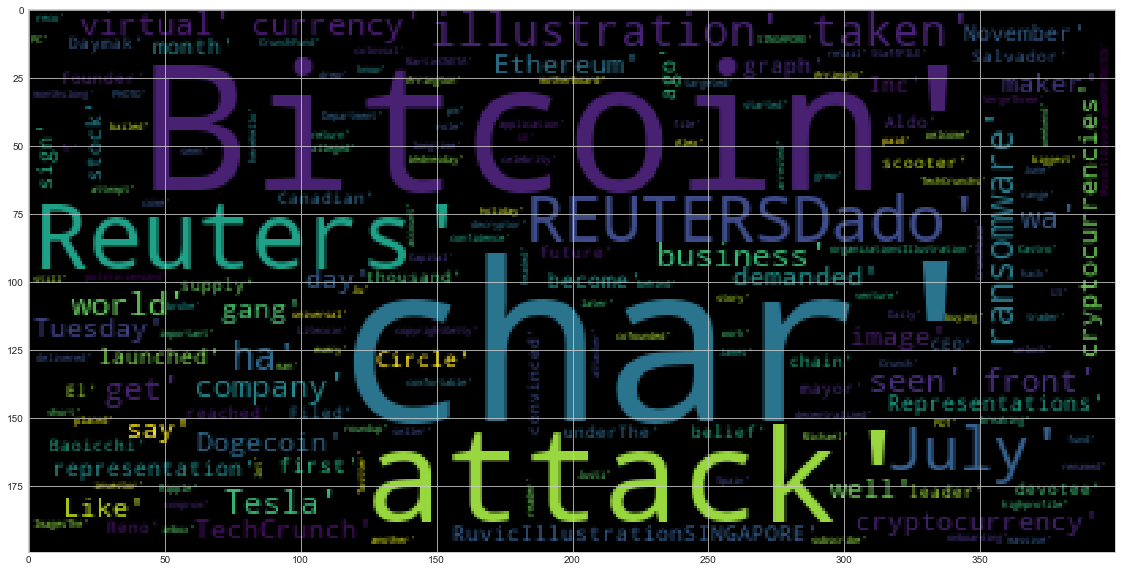

In [118]:
# Generate the Bitcoin word cloud
btc_words=[]
for i in btc_sentiment_df['Tokenized Words']:
    for j in i:
        btc_words.append(j)
# YOUR CODE HERE!
btc_wc=WordCloud().generate(str(btc_words))
plt.imshow(btc_wc)

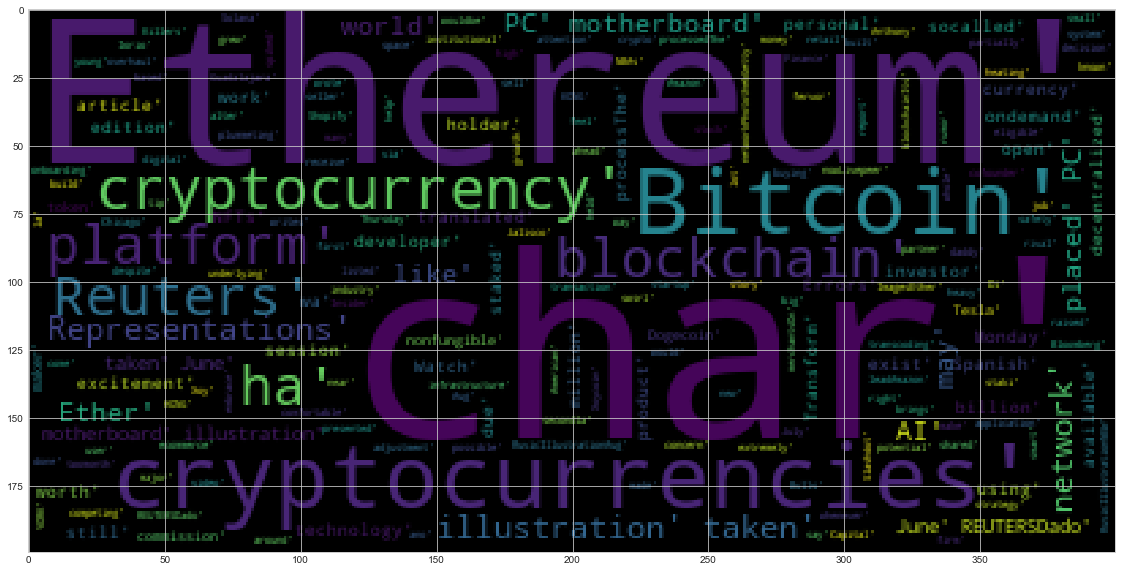

In [119]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_words=[]
for i in eth_sentiment_df['New Tokens']:
    for j in i:
        eth_words.append(j)
# YOUR CODE HERE!
eth_wc=WordCloud().generate(str(eth_words))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [120]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [124]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [151]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_ner=[]
for i in btc_df['text']:
    btc_ner.append(i)

In [158]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_nlp_text=nlp(str(btc_ner))
# Add a title to the document
# YOUR CODE HERE!


In [161]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(btc_nlp_text,style='ent',jupyter=True)

---

### Ethereum NER

In [160]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_ner=[]
for i in eth_df['text']:
    eth_ner.append(i)

In [164]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_nlp_text=nlp(str(eth_ner))
# Add a title to the document
# YOUR CODE HERE!

In [165]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_nlp_text,style='ent',jupyter=True)

---